In [19]:
import nltk
from nltk.corpus import gutenberg

nltk.download("gutenberg")

for idx, fileid in enumerate(gutenberg.fileids()):
    print(f"#{idx+1} {fileid}")

#1 austen-emma.txt
#2 austen-persuasion.txt
#3 austen-sense.txt
#4 bible-kjv.txt
#5 blake-poems.txt
#6 bryant-stories.txt
#7 burgess-busterbrown.txt
#8 carroll-alice.txt
#9 chesterton-ball.txt
#10 chesterton-brown.txt
#11 chesterton-thursday.txt
#12 edgeworth-parents.txt
#13 melville-moby_dick.txt
#14 milton-paradise.txt
#15 shakespeare-caesar.txt
#16 shakespeare-hamlet.txt
#17 shakespeare-macbeth.txt
#18 whitman-leaves.txt


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\tamuk\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [20]:
import re

authors = set()

for fileid in gutenberg.fileids():
    match = re.search(r"^(.+?)-", fileid)
    if match:
        authors.add(match.group(1))

book_data_dict = {}

for index, author in enumerate(authors):
    books = [gutenberg.paras(fileid) for fileid in gutenberg.fileids() if author in fileid]
    para_num = len([paras for book in books for paras in book])
    book_data_dict[author] = para_num

sorted_dict: dict[str, int] = dict(
    sorted(book_data_dict.items(), key=lambda pd: pd[1], reverse=True)
)

for idx, item in enumerate(sorted_dict.items()):
    print(f"#{idx + 1}: {item[0]} - {item[1]}")

#1: bible - 24608
#2: austen - 5265
#3: chesterton - 4055
#4: edgeworth - 3726
#5: melville - 2793
#6: whitman - 2478
#7: shakespeare - 2372
#8: bryant - 1194
#9: carroll - 817
#10: blake - 284
#11: burgess - 266
#12: milton - 29


In [35]:
import grammar_analysis as ga

TARGET = "whitman"
NON_TARGET = "shakespeare"

nontarget_books = [
    gutenberg.paras(file_id) for file_id in gutenberg.fileids() if NON_TARGET in file_id
]
target_books = [gutenberg.paras(file_id) for file_id in gutenberg.fileids() if TARGET in file_id]

nontarget_paras = [paras for book in nontarget_books for paras in book]
target_paras = [paras for book in target_books for paras in book]

for para in nontarget_paras:
    print(" ".join(ga.para2sent(para)))
print(f"Author: {NON_TARGET}, {len(nontarget_paras)} paragraphs")

[ The Tragedie of Julius Caesar by William Shakespeare 1599 ]
Actus Primus . Scoena Prima .
Enter Flauius , Murellus , and certaine Commoners ouer the Stage .
Flauius . Hence : home you idle Creatures , get you home : Is this a Holiday ? What , know you not ( Being Mechanicall ) you ought not walke Vpon a labouring day , without the signe Of your Profession ? Speake , what Trade art thou ? Car . Why Sir , a Carpenter
Mur . Where is thy Leather Apron , and thy Rule ? What dost thou with thy best Apparrell on ? You sir , what Trade are you ? Cobl . Truely Sir , in respect of a fine Workman , I am but as you would say , a Cobler
Mur . But what Trade art thou ? Answer me directly
Cob . A Trade Sir , that I hope I may vse , with a safe Conscience , which is indeed Sir , a Mender of bad soules
Fla . What Trade thou knaue ? Thou naughty knaue , what Trade ? Cobl . Nay I beseech you Sir , be not out with me : yet if you be out Sir , I can mend you
Mur . What mean ' st thou by that ? Mend mee ,

In [36]:
for para in target_paras:
    print(" ".join(ga.para2sent(para)))
print(f"Author: {TARGET}, {len(target_paras)} paragraphs")

[ Leaves of Grass by Walt Whitman 1855 ]
Come , said my soul , Such verses for my Body let us write , ( for we are one ,) That should I after return , Or , long , long hence , in other spheres , There to some group of mates the chants resuming , ( Tallying Earth ' s soil , trees , winds , tumultuous waves ,) Ever with pleas ' d smile I may keep on , Ever and ever yet the verses owning -- as , first , I here and now Signing for Soul and Body , set to them my name ,
Walt Whitman
[ BOOK I . INSCRIPTIONS ]
} One ' s - Self I Sing
One ' s - self I sing , a simple separate person , Yet utter the word Democratic , the word En - Masse .
Of physiology from top to toe I sing , Not physiognomy alone nor brain alone is worthy for the Muse , I say the Form complete is worthier far , The Female equally with the Male I sing .
Of Life immense in passion , pulse , and power , Cheerful , for freest action form ' d under the laws divine , The Modern Man I sing .
} As I Ponder ' d in Silence
As I ponder '

In [23]:
from grammar_analysis import FrequencyCalculator

fc = FrequencyCalculator()
all_tags: set[str] = set()

for paras in nontarget_paras + target_paras:
    for para in paras:
        all_tags.update(fc.all_pos_frequency(para).keys())

print(all_tags)


{'RB', 'IN', 'VBD', 'PRP$', 'WDT', '(', 'LS', 'NN', '.', 'POS', ')', 'MD', 'VB', 'WRB', 'JJS', ':', 'TO', 'VBP', 'PRP', 'RP', 'VBZ', 'NNS', 'UH', 'VBG', 'NNPS', 'WP$', 'CC', 'CD', "''", 'FW', 'RBS', 'RBR', 'EX', 'PDT', ',', 'VBN', 'DT', 'JJR', 'JJ', 'WP', 'SYM', 'NNP'}


In [24]:
from grammar_analysis import DatasetGenerator
import pandas as pd
import numpy as np

dg = DatasetGenerator(all_tags)
data = []
correctness = []

for a_para in nontarget_paras:
    x, y = dg.generate_dataset_para(a_para, all_tags, False)
    data.append(x)
    correctness.append(y)

for b_para in target_paras:
    x, y = dg.generate_dataset_para(b_para, all_tags, True)
    data.append(x)
    correctness.append(y)

df = pd.DataFrame(data, columns=dg.columns)
nd_correctness = np.array(correctness)

display(df.head(10))


,word variation,uncommon word frequency,sentence length,average word length,RB,IN,VBD,PRP$,WDT,(,...,EX,PDT,",",VBN,DT,JJR,JJ,WP,SYM,NNP
0,1.000000,0.818182,11,4.636364,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.0,0.090909
1,0.833333,1.000000,6,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.166667
2,0.916667,0.833333,12,4.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.166667,0.000000,0.083333,0.0,0.000000,0.000000,0.0,0.083333
3,0.736842,0.771930,57,3.596491,0.035088,0.017544,0.000000,0.017544,0.000000,0.017544,...,0.0,0.000000,0.087719,0.000000,0.017544,0.0,0.017544,0.017544,0.0,0.017544
4,0.784314,0.705882,51,3.176471,0.019608,0.019608,0.019608,0.000000,0.000000,0.000000,...,0.0,0.000000,0.098039,0.000000,0.039216,0.0,0.019608,0.019608,0.0,0.019608
5,1.000000,0.818182,11,3.636364,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.090909,0.0,0.090909
6,0.785714,0.750000,28,3.071429,0.035714,0.035714,0.000000,0.000000,0.035714,0.000000,...,0.0,0.000000,0.142857,0.000000,0.071429,0.0,0.035714,0.000000,0.0,0.035714
7,0.692308,0.666667,39,2.974359,0.025641,0.025641,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.076923,0.000000,0.000000,0.0,0.000000,0.025641,0.0,0.051282
8,0.833333,0.875000,24,2.916667,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.083333,0.000000,0.041667,0.0,0.041667,0.041667,0.0,0.041667
9,0.782051,0.730769,78,3.333333,0.012821,0.012821,0.000000,0.012821,0.000000,0.000000,...,0.0,0.012821,0.089744,0.012821,0.012821,0.0,0.012821,0.000000,0.0,0.012821


In [25]:
print(df.shape)

(4850, 46)


In [26]:
print(df.dtypes)


word variation             float64
uncommon word frequency    float64
sentence length              int64
average word length        float64
RB                         float64
IN                         float64
VBD                        float64
PRP$                       float64
WDT                        float64
(                          float64
LS                         float64
NN                         float64
.                          float64
POS                        float64
)                          float64
MD                         float64
VB                         float64
WRB                        float64
JJS                        float64
:                          float64
TO                         float64
VBP                        float64
PRP                        float64
RP                         float64
VBZ                        float64
NNS                        float64
UH                         float64
VBG                        float64
NNPS                

In [27]:
print(df.isna().sum())

word variation             0
uncommon word frequency    0
sentence length            0
average word length        0
RB                         0
IN                         0
VBD                        0
PRP$                       0
WDT                        0
(                          0
LS                         0
NN                         0
.                          0
POS                        0
)                          0
MD                         0
VB                         0
WRB                        0
JJS                        0
:                          0
TO                         0
VBP                        0
PRP                        0
RP                         0
VBZ                        0
NNS                        0
UH                         0
VBG                        0
NNPS                       0
WP$                        0
CC                         0
CD                         0
''                         0
FW                         0
RBS           

In [28]:
import sklearn
import lightgbm as lgb

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, nd_correctness)

model = lgb.LGBMClassifier()
model.fit(X_train.values, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

val = sklearn.metrics.roc_auc_score(y_test, y_pred_prob)
print(f"auc-rocスコア: {val}")


auc-rocスコア: 0.9818056621541442


In [29]:
display(pd.crosstab(y_test, y_pred))


col_0,False,True
row_0,,
False,556,30
True,50,577


In [30]:
import shap

exp = shap.TreeExplainer(model)
sv_test = exp.shap_values(X_test)[1]

shap.initjs()
shap.force_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


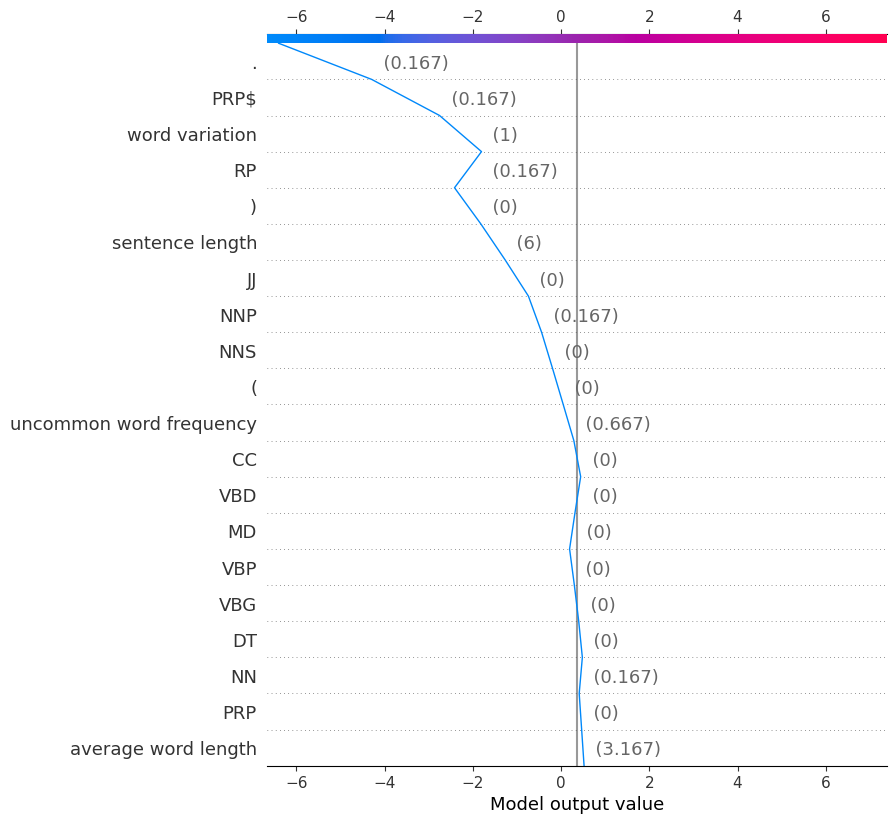

In [31]:
shap.decision_plot(exp.expected_value[1], sv_test[0], X_test.iloc[0])


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


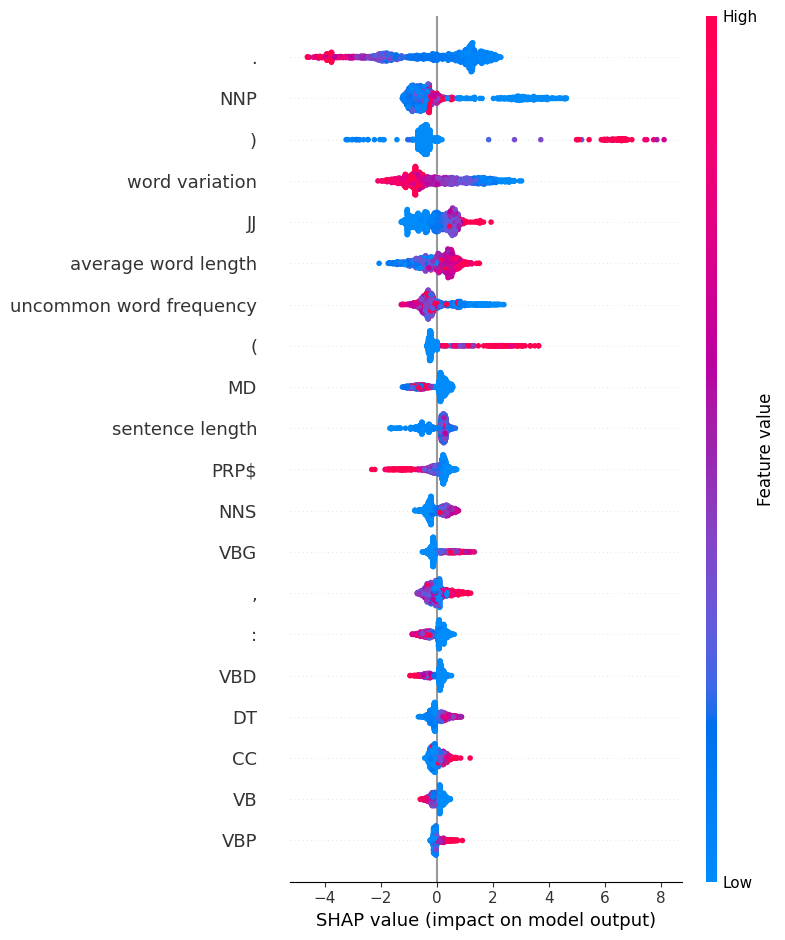

In [32]:
shap.summary_plot(sv_test, X_test)


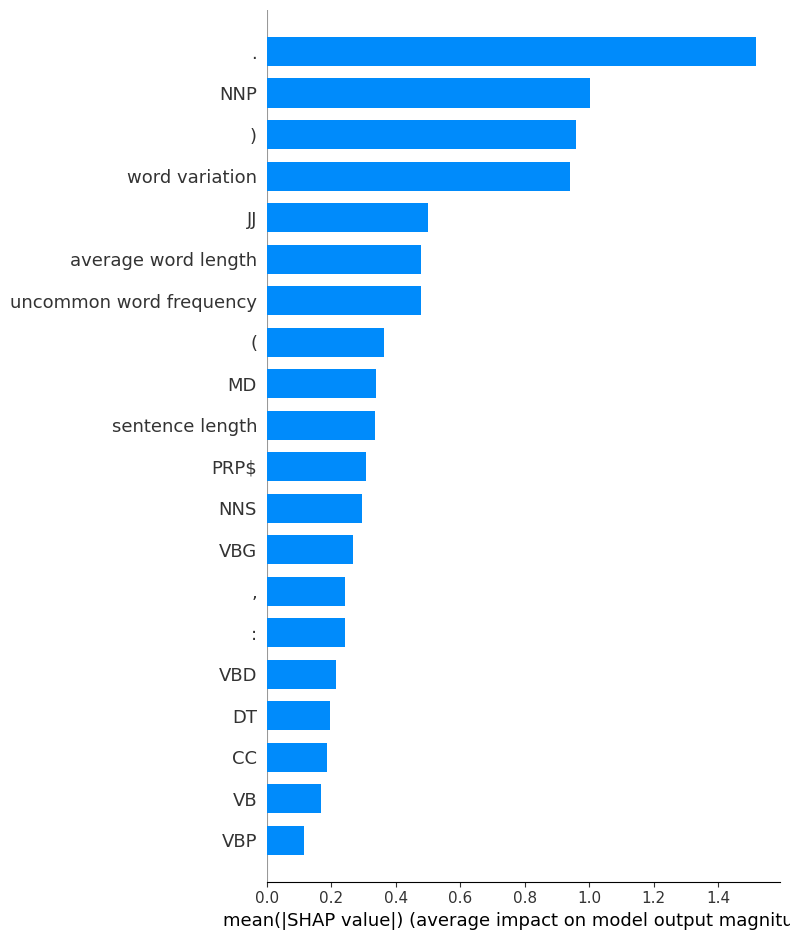

In [33]:
shap.summary_plot(sv_test, X_test, plot_type="bar")
